In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Assignment_2_SoccerPlayers.csv', encoding = 'unicode_escape')
data.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_in_M,Wage_in_K,Jersey_Number,Height_in_Inches,Weight_in_lbs,Reactions,Balance,Strength
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565,10,67,159,95,95,59
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405,7,74,183,96,70,79
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290,10,69,150,94,84,49
3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,260,1,76,168,90,43,64
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,355,7,71,154,91,77,75


In [ ]:
df = data[['Reactions','Balance','Strength','Value_in_M']]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
df_transformed = pd.DataFrame(trans.fit_transform(df),columns = ['Reactions','Balance','Strength','Value_in_M'])


In [ ]:
df_transformed

,Reactions,Balance,Strength,Value_in_M
0,0.966667,0.985915,0.416667,0.932489
1,1.000000,0.633803,0.750000,0.649789
2,0.933333,0.830986,0.250000,1.000000
3,0.800000,0.253521,0.500000,0.607595
4,0.833333,0.732394,0.683333,0.860759
...,...,...,...,...
495,0.366667,0.239437,0.516667,0.105485
496,0.266667,0.760563,0.400000,0.147679
497,0.433333,0.619718,0.366667,0.130802
498,0.400000,0.845070,0.316667,0.126582


In [ ]:
X = df_transformed.drop('Value_in_M',axis = 1)
y = df_transformed['Value_in_M']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
type(y)

pandas.core.series.Series

As a thumb rule, weight matrix has following dimensions :

The number of rows must equal the number of neurons in the previous layer.
The number of columns must match the number of neurons in the next layer.

For the problem statement, weight matrix shape is (3,1)

In [ ]:
def loss_function(weights,X,y):
  k = float(len(y))

  y_pred = X.dot(weights)
  loss = (1/(2*k)) * np.sum(np.square(y_pred-y))
  return loss

In [ ]:
def gradient_descent(X,y,weights,lr=0.05,iterations=400):
    k = float(len(y))
    cost_history = np.zeros(iterations)
    weights_history = np.zeros((iterations,3))
    for i in range(iterations):
        y_pred = np.dot(X,weights)
        weights = weights -(1/k)*lr*(X.T.dot((y_pred - y)))
        weights_history[i,:] =weights.T
        cost_history[i]  = loss_function(weights,X,y)
    return weights, cost_history, weights_history
        

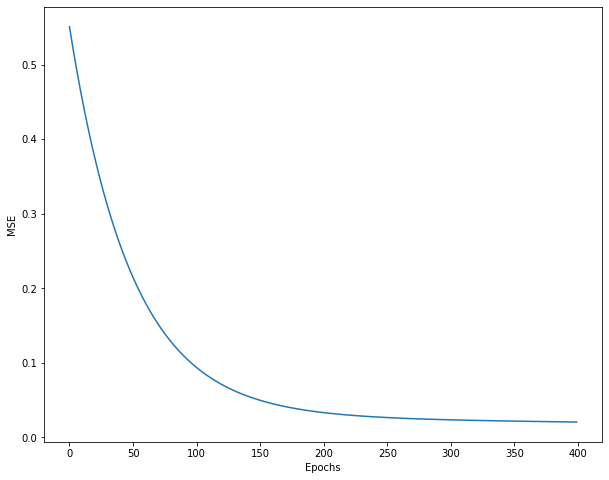

In [ ]:
lr =0.01
n_iter = 400

#converting weights into a 1-D matrix
weights = np.random.randn(3,1).squeeze()

weights,cost_history,weights_history = gradient_descent(X_train,y_train,weights,lr,n_iter)

fig,ax = plt.subplots(figsize=(10,8))
plt.xlabel('Epochs')
plt.ylabel('MSE')

#taking plot for 400 iterations
_=ax.plot(range(400),cost_history[:400])

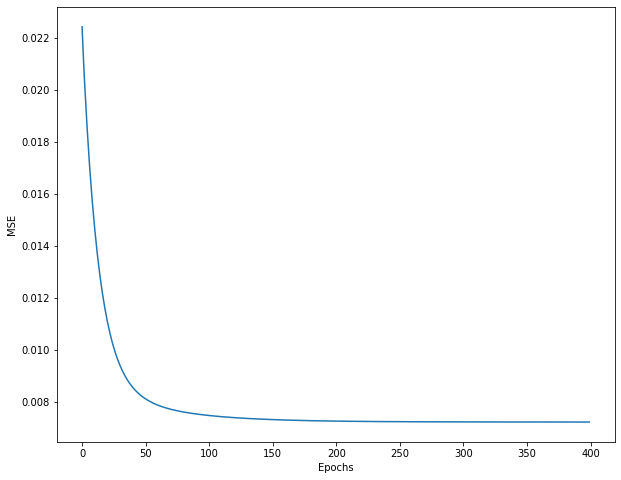

In [ ]:
#higher learning rate is used as the number of testing samples are small.
lr1 = 0.5
n_iter = 400
weights,cost_history,weights_history = gradient_descent(X_test,y_test,weights,lr1,n_iter)

fig,ax = plt.subplots(figsize=(10,8))
plt.xlabel('Epochs')
plt.ylabel('MSE')

#taking plot for 400 iterations
_=ax.plot(range(400),cost_history[:400])

In [ ]:
#Stochastic Gradient descent

# we pick a random sample and adjust weights

def Stochastic_gradient_descent(X,y,epochs,learning_rate=0.5):
  no_of_observations = X.shape[0]
  no_of_features = X.shape[1]
  weights = np.ones(shape=(no_of_features))
  print(weights.shape)
  bias = 0
  cost_history_sgd = []
  epoch_history_sgd = []

  for i in range(epochs):
    ind = np.random.randint(0, no_of_observations - 1)
    X_trial = X[ind]
    y_trial = y[ind]

    y_pred = np.dot(weights, X_trial.T) + bias
    loss = np.square(y_trial - y_pred) 

    
    w_grad = -(2/no_of_observations)*(X_trial.T.dot(y_trial-y_pred))
    b_grad = -(2/no_of_observations)*(y_trial-y_pred)

    if(i%50 == 0):
      cost_history_sgd.append(loss)
      epoch_history_sgd.append(i)   

    weights = weights - learning_rate * w_grad
    bias = bias - learning_rate * b_grad
        
  return weights, bias, loss, cost_history_sgd, epoch_history_sgd

In [ ]:
#preprocessig the train and test columns using Min Max Scaler
X1 = trans.fit_transform(df[['Reactions','Balance','Strength']])
y1 = trans.fit_transform(df['Value_in_M'].values.reshape(df.shape[0],1))

X1_train,X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=20)

(3,)


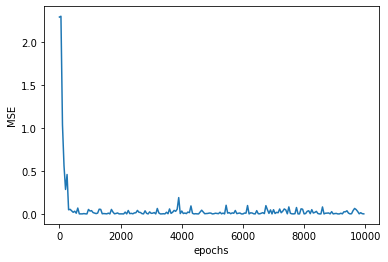

In [ ]:
#MSE vs epochs in train dataset
weights_sgd, bias_sgd, loss_sgd, cost_list_sgd, epoch_list_sgd = Stochastic_gradient_descent(X1_train,y1_train.reshape(y1_train.shape[0],),10000)
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.plot(epoch_list_sgd,cost_list_sgd)

(3,)


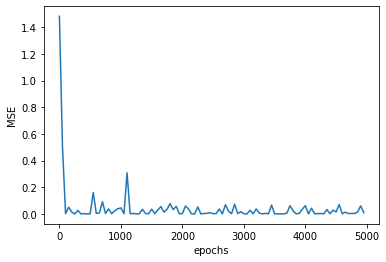

In [ ]:
#MSE vs epochs in test dataset

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = Stochastic_gradient_descent(X1_test,y1_test.reshape(y1_test.shape[0],),5000)
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.plot(epoch_list_sgd,cost_list_sgd)

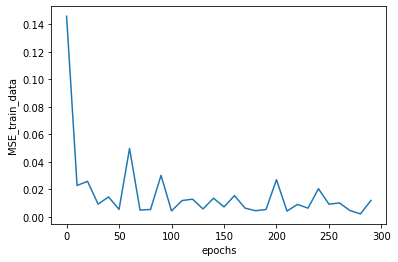

In [ ]:
#mini batch Gradient descent with batch size 12
def MB_GD(X, y, epochs = 1000, batch_size = 12, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    weights = np.ones(shape=(number_of_features)) 
    bias = 0
    no_of_observations = X.shape[0] # number of rows in X
    
    if batch_size > no_of_observations: # In this case mini batch becomes same as batch gradient descent
        batch_size = no_of_observations
        
    cost_list_MBGD = []
    epoch_list_MBGD = []
    
    num_batches = int(no_of_observations/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(no_of_observations)
        X2 = X[random_indices]
        y2 = y[random_indices]
        
        for l in range(0,no_of_observations,batch_size):
            X_trial = X2[l:l+batch_size]
            y_trial = y2[l:l+batch_size]
            y_pred = np.dot(weights, X_trial.T) + bias
            
            w_grad = -(2/len(X_trial))*(X_trial.T.dot(y_trial-y_pred))
            b_grad = -(2/len(X_trial))*np.sum(y_trial-y_pred)
            
            weights = weights - learning_rate * w_grad
            bias = bias - learning_rate * b_grad
                
            cost = np.mean(np.square(y_trial-y_pred)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list_MBGD.append(cost)
            epoch_list_MBGD.append(i)
        
    return weights, bias, cost, cost_list_MBGD, epoch_list_MBGD



w_mbgd, b_mbgd, loss, loss_MGD_list, epochs_MGD_list = MB_GD(X1_train,y1_train.reshape(y1_train.shape[0],),300)
plt.xlabel("epochs")
plt.ylabel("MSE_train_data")
plt.plot(epochs_MGD_list,loss_MGD_list)

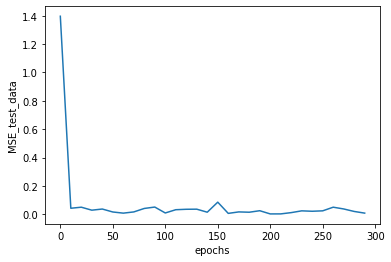

In [ ]:
w_mgd, b_mgd, loss, loss_MGD_list, epochs_MGD_list = MB_GD(X1_test,y1_test.reshape(y1_test.shape[0],),300)
plt.xlabel("epochs")
plt.ylabel("MSE_test_data")
plt.plot(epochs_MGD_list,loss_MGD_list)

##2

What are the hyper parameters of ADAM Gradient descent and what are their impact on performance of the ADAM Gradient Descent?


##Answer
Hyper parameters: 

 Alpha - Step Size or learning rate

 Beta1 and Beta2 - Exponential Decay rates(e.g., 0.9 and 0.999) 

Epsilon - A small positive value taken. 
 


- **Alpha - Learning rate** is optimised or it changes for every epoch as soon as new weights are calculated. This is the difference between Gradient descent algortihm and Adam optimiser algorithm. 

- **Beta 1 and Beta 2** are used as parameters in optimising the momentum and velocity of the gradient descent.  They are used to update biased first moment and second moment estimates. These are helpful in adjust the learning rate in which more preference is given to the recent learned weights and gradually less preference to the older weights.

- Epsilon is used inorder to keep the reminder of the learning rate optimisation formula to be positive.






##3

RMSProp is Prof Geoffrey Hinton’s favorite Gradient Descent approach. Why? Name two reasons.

##Answer

RMSProp is Prof Geoffrey Hinton’s favorite Gradient Descent approach because 
In RMSProp, 

- It takes the advantages of mini batch learning which is really helpful for larger datasets and also Rprop which uses gradient in order to adjust the learning rate.

- Adaptive learning rates which use square of the weight averages. This is helpful in making the learing rate work much better. You perform exponential averaging of gradients and keep vertical learning rate low and horizonrtal learning rate much faster.

- In Rprop, we use gradient and also divide the size of the gradient in irder to get the same magnitude without taking into consideration the magnitude of that particular gradient. But in mini-batches, we get different gradient every time, so with RMP Prop we calculate moving average for each batch and also maintain a similar value in denominator no matter how big or small the gradient size is. 

